# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from keras.callbacks import EarlyStopping
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from xgboost import plot_tree
from xgboost import to_graphviz
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from keras.utils import np_utils
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from keras.utils.vis_utils import plot_model


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
stacking = 'True'

In [4]:
data_size = 'large'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.11/dataset/superconductors.csv')

In [6]:
target_col = 'critical_temp'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 5

In [10]:
threshold_Z = 3.0

#### Dataset copy

In [11]:
df_copy = df.copy()

### Dataset Information

In [12]:
df.shape

(21263, 82)

#### Some records

In [13]:
display(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


#### Dataframe structure

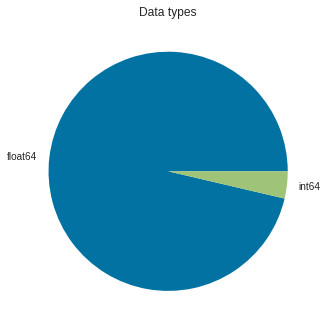

In [14]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [15]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
range_Valence,21263.0,2.041010,1.242345,0.000000,1.000000,2.000000,3.000000,6.0000
wtd_range_Valence,21263.0,1.483007,0.978176,0.000000,0.921454,1.063077,1.918400,6.9922
std_Valence,21263.0,0.839342,0.484676,0.000000,0.451754,0.800000,1.200000,3.0000
wtd_std_Valence,21263.0,0.673987,0.455580,0.000000,0.306892,0.500000,1.020436,3.0000


#### Which columns could be categorical ?

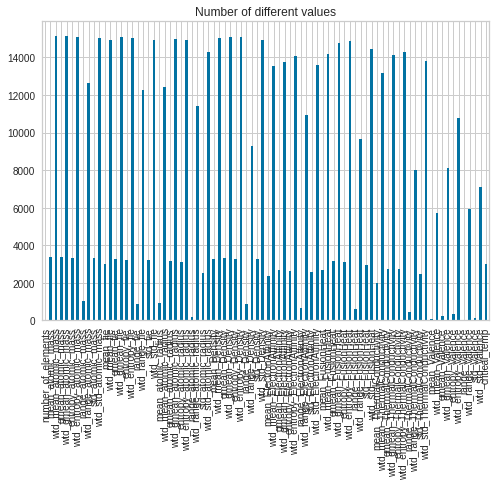

In [16]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [17]:
duplicates(df)

Number of rows before removing: 21263
Number of duplicate rows: 66
Number of rows after removing: 21197


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


#### Drop user's columns:

In [18]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [19]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [20]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [21]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [22]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [23]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: number_of_elements
Encoding numeric column: mean_atomic_mass
Encoding numeric column: wtd_mean_atomic_mass
Encoding numeric column: gmean_atomic_mass
Encoding numeric column: wtd_gmean_atomic_mass
Encoding numeric column: entropy_atomic_mass
Encoding numeric column: wtd_entropy_atomic_mass
Encoding numeric column: range_atomic_mass
Encoding numeric column: wtd_range_atomic_mass
Encoding numeric column: std_atomic_mass
Encoding numeric column: wtd_std_atomic_mass
Encoding numeric column: mean_fie
Encoding numeric column: wtd_mean_fie
Encoding numeric column: gmean_fie
Encoding numeric column: wtd_gmean_fie
Encoding numeric column: entropy_fie
Encoding numeric column: wtd_entropy_fie
Encoding numeric column: range_fie
Encoding numeric column: wtd_range_fie
Encoding numeric column: std_fie
Encoding numeric column: wtd_std_fie
Encoding numeric column: mean_atomic_radius
Encoding numeric column: wtd_mean_atomic_radius
Encoding numeric column: gmean_atomic_radius
Enc

#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


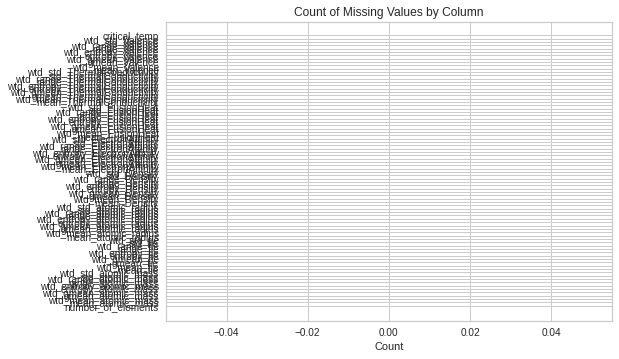

In [24]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [25]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [26]:
df = downcast_dtypes(df)

Memory usage of dataframe is 13.30MB
Memory usage after optimization is: 3.33MB
Decreased by 75.0%


##### Dataframe structure after compression

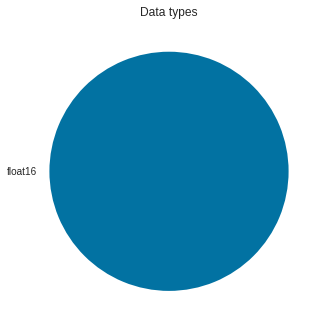

In [27]:
plot_dataframe_structure(df)

#### Outliers:

In [28]:
df = outliers(df, threshold_Z)

Using Z_score,  4836  rows will be suppressed.


#### Splitting dataframe in features and targets

In [29]:
y = df[target_col]

In [30]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

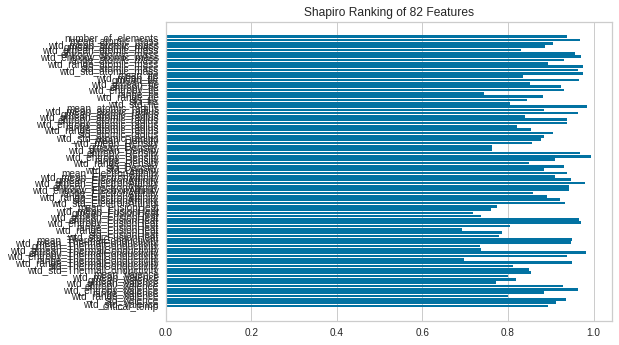

In [31]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

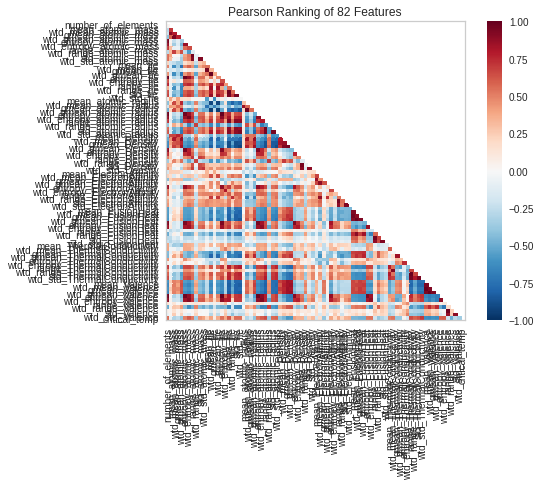

In [32]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

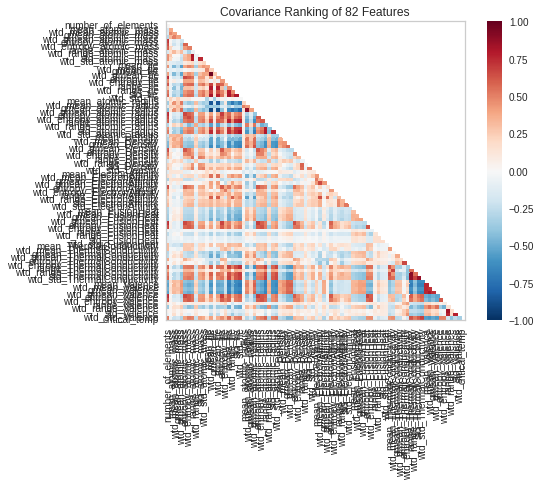

In [33]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

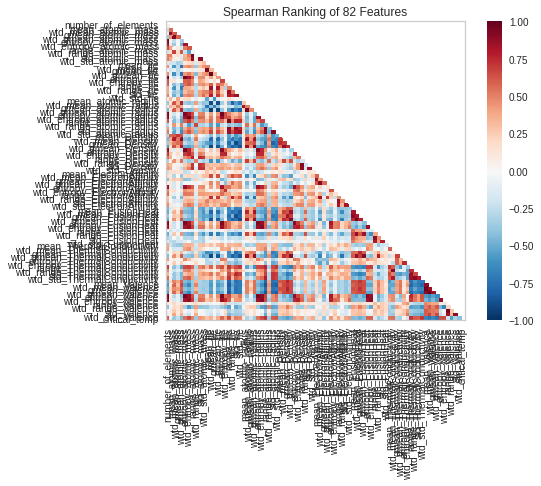

In [34]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

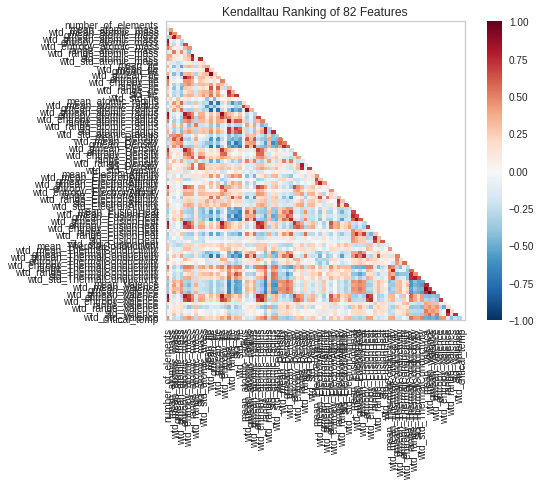

In [35]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

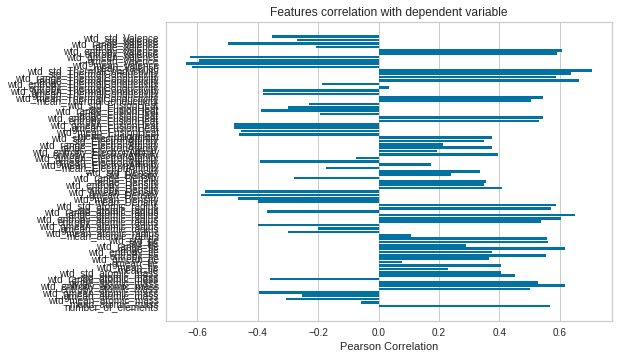

In [36]:
feature_correlation(X, y);

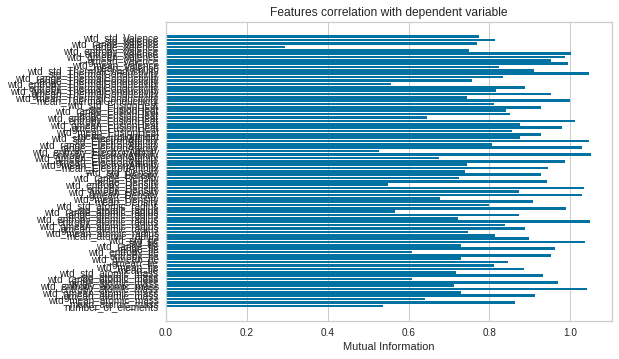

In [37]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

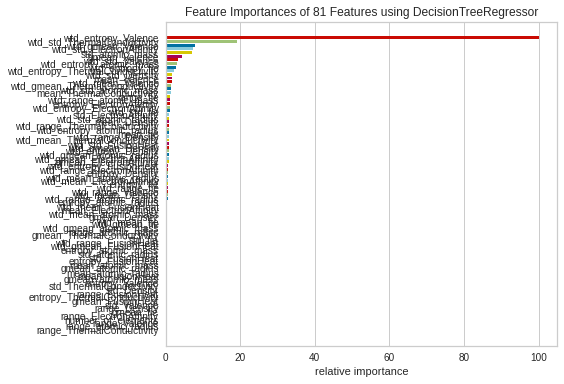

In [38]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

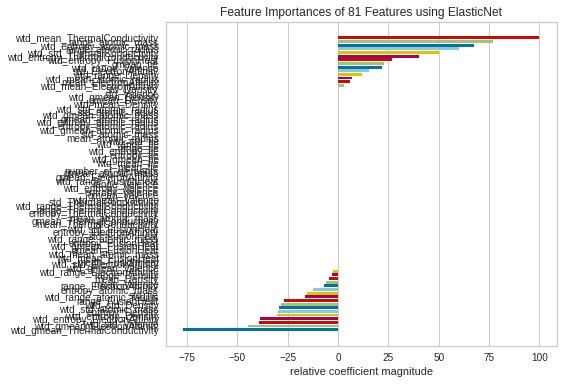

In [39]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

## Splittings 

In [40]:
df = df_copy

#### Splitting dataframe in features and targets

In [41]:
y = df[target_col]

In [42]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [43]:
d_F=len(X.columns.tolist())

In [44]:
d_T=len(y.unique())

##### Splitting data in train and test sets 

In [45]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, stratify=None)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [46]:
cat_selector = make_column_selector(dtype_include=object)

In [47]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [48]:
cat_tree_processor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [49]:
num_tree_processor = SimpleImputer(strategy='mean', add_indicator=True)

In [50]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [51]:
cat_ntree_processor = OneHotEncoder(handle_unknown='ignore')

In [52]:
num_ntree_processor = make_pipeline(StandardScaler(), SimpleImputer(strategy='mean', add_indicator=True))

In [53]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Keras neural network definition

In [54]:
def K_Regre(): 
    keras.backend.clear_session()
#   neural network architecture: start  
    model = Sequential() 
    model.add(Dense(d_F + 1 + 2, input_dim=d_F, activation='relu')) 
    model.add(BatchNormalization()) 
#    model.add(LayerNormalization()) 
#   model.add(Dense(d_F + 1 + 2, activation='relu')) 
    model.add(Dense(1)) 
    model.compile(loss='mean_squared_error', optimizer='adam') 
#   neural network architecture: end   
    return model  
#   Keras training parameters: epoch and batch_size 
K_R = KerasRegressor(build_fn=K_Regre, epochs=1000, batch_size=64, verbose=0) 
K_R._estimator_type = 'regressor'

##### Level-0 models

In [59]:
level_0 = [ 
          ('SGDR', make_pipeline(ntree_preprocessor, SGDRegressor(loss='squared_loss'))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.5))), 
          ('SVRL', make_pipeline(ntree_preprocessor, SVR(kernel='linear'))), 
          ('SVRP', make_pipeline(ntree_preprocessor, SVR(kernel='poly'))), 
          ('SVRG', make_pipeline(ntree_preprocessor, SVR(kernel='rbf'))), 
          ('XGBR', make_pipeline(tree_preprocessor, XGBRegressor(max_depth=5, n_estimators=20, verbosity=0))), 
          ]

##### Level-1 model

In [60]:
level_1 = MLPRegressor()

##### Stacking for regression

In [61]:
model = StackingRegressor(level_0, final_estimator=level_1)

### Model fitting

In [62]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 7min 38s, sys: 31.8 s, total: 8min 10s
Wall time: 6min 33s


StackingRegressor(estimators=[('SGDR',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline',
                                                                                 Pipeline(steps=[('standardscaler',
                                                                                                  StandardScaler()),
                                                                                                 ('simpleimputer',
                                                                                                  SimpleImputer(add_indicator=True))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cdcb60310>),
                                                                                ('onehotencoder',
                                                                                 OneHotEncoder(handle_unkno...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_delta_step=None,
                                                             max_depth=5,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=20,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=0))]))],
                  final_estimator=MLPRegressor())

### Model evaluation

#### Model scoring

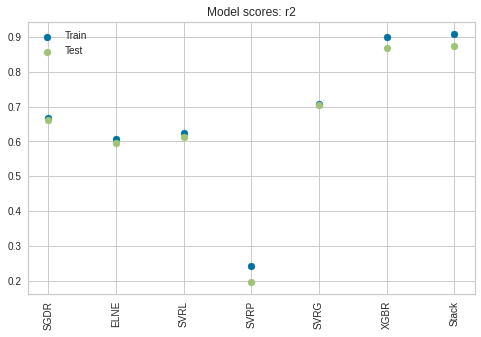

array([['SGDR', 0.668796320728458, 0.6614643157556643],
       ['ELNE', 0.6064974958599936, 0.5955866085202569],
       ['SVRL', 0.6238104168937743, 0.6134995245029038],
       ['SVRP', 0.24197476994044265, 0.19726928734285887],
       ['SVRG', 0.707898978427514, 0.7038960685025194],
       ['XGBR', 0.8997506069518973, 0.8679454086558244],
       ['Stack', 0.9074646162694042, 0.8748418942093386]], dtype=object)

In [63]:
score_stacking_r(model, X_train, y_train, X_test, y_test)

#### Residuals plot

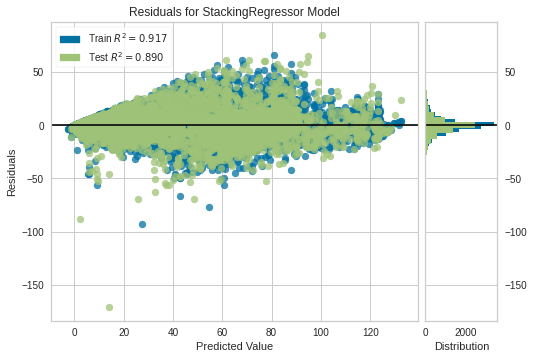

In [64]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

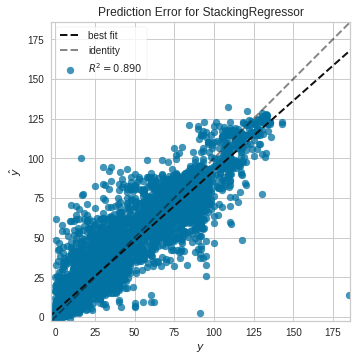

In [65]:
prediction_error(model, X_train, y_train, X_test, y_test);